used_time: 0.0007219314575195312
[3 3] 1 1
[4 3] 1 1
[1 1] -1 -1


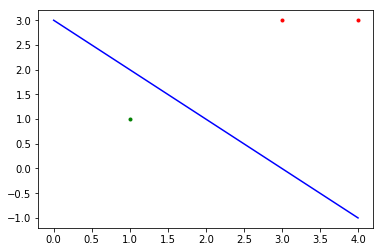

In [40]:
#随机梯度下降
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
class perceptron():
    def __init__(self,eta=1):
        self.eta=eta
    def sign(self,f):
        if f>=0:
            return 1
        else:
            return -1
    def predict(self,xi):
        return(self.sign(self.w.dot(xi)+self.b))
    def train(self,x,y):
        all_divided=False
        self.w=np.zeros((x.shape[1]))
        self.b=0
        while not all_divided:
            num=np.random.randint(len(x))
            xi,yi=x[num],y[num]
            pre_yi=self.predict(xi)
            if(pre_yi!=yi):
                self.w=self.w+self.eta*xi*yi
                self.b=self.b+self.eta*yi
            all_divided=True
            for i,xi in enumerate(x):
                if self.predict(xi)!=y[i]:
                    all_divided=False
                    break
def main():
    x=np.array([[3,3],[4,3],[1,1]])
    y=np.array([1,1,-1])
    clf=perceptron()
    t1=time.time()
    clf.train(x,y)
    print('used_time:',time.time()-t1)   
    for i,xi in enumerate(x):
        print(xi,clf.predict(xi),y[i])
    plt.plot([3,4],[3,3],'r.')
    plt.plot(1,1,'g.')
    plt.plot([0,4],[(-clf.b-clf.w[0]*0)/clf.w[1],
        (-clf.b-clf.w[0]*4)/clf.w[1]],'b')
    plt.show()
if __name__ == '__main__':
    main()

used_time: 0.0026047229766845703
[3 3] 1 1
[4 3] 1 1
[1 1] -1 -1


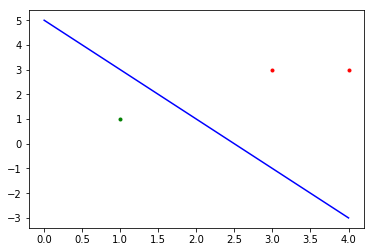

In [42]:
#利用对偶形式
import numpy as np
import matplotlib.pyplot as plt
import time
class perceptron():
    def __init__(self,eta=0.1):
        self.eta=eta
    def sign(self,f):
        if f>=0:
            return 1
        else:
            return -1
    def predict(self,xi):
        return(self.sign(self.w.dot(xi)+self.b))
    def train(self,x,y):
        all_divided=False
        self.alpha=np.zeros((len(x)))
        self.w=np.zeros((x.shape[1]))
        self.b=0
        while not all_divided:
            num=np.random.randint(len(x))
            xi,yi=x[num],y[num]
            w_sum=y[0]*self.alpha[0]*x[0]
            for j,xj in enumerate(x[1:]):
                w_sum=w_sum+y[j+1]*self.alpha[j+1]*(x[j+1])
            g=yi*(w_sum.dot(xi)+self.b)
            if(g<=0):
                self.alpha[num]=self.alpha[num]+self.eta
                self.b=self.b+self.eta*yi
                w_sum=y[0]*self.alpha[0]*x[0]
                for j,xj in enumerate(x[1:]):
                    w_sum=w_sum+y[j+1]*self.alpha[j+1]*(x[j+1])
                self.w=w_sum
            all_divided=True
            for i,xi in enumerate(x):
                if self.predict(xi)!=y[i]:
                    all_divided=False
                    break
def main():
    x=np.array([[3,3],[4,3],[1,1]])
    y=np.array([1,1,-1])
    clf=perceptron()
    t1=time.time()
    clf.train(x,y)
    print('used_time:',time.time()-t1)
    for i,xi in enumerate(x):
        print(xi,clf.predict(xi),y[i])
    plt.plot([3,4],[3,3],'r.')
    plt.plot(1,1,'g.')
    plt.plot([0,4],[(-clf.b-clf.w[0]*0)/clf.w[1],
        (-clf.b-clf.w[0]*4)/clf.w[1]],'b')
    plt.show()
if __name__ == '__main__':
    main()

In [43]:
#调包sklearn
import numpy as np
from sklearn.linear_model import Perceptron
import time
x=np.array([[3,3],[4,3],[1,1]])
y=np.array([1,1,-1])
clf=Perceptron(eta0=1)
t1=time.time()
clf.fit(x,y)
time.time()-t1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.0007066726684570312